Question 1:

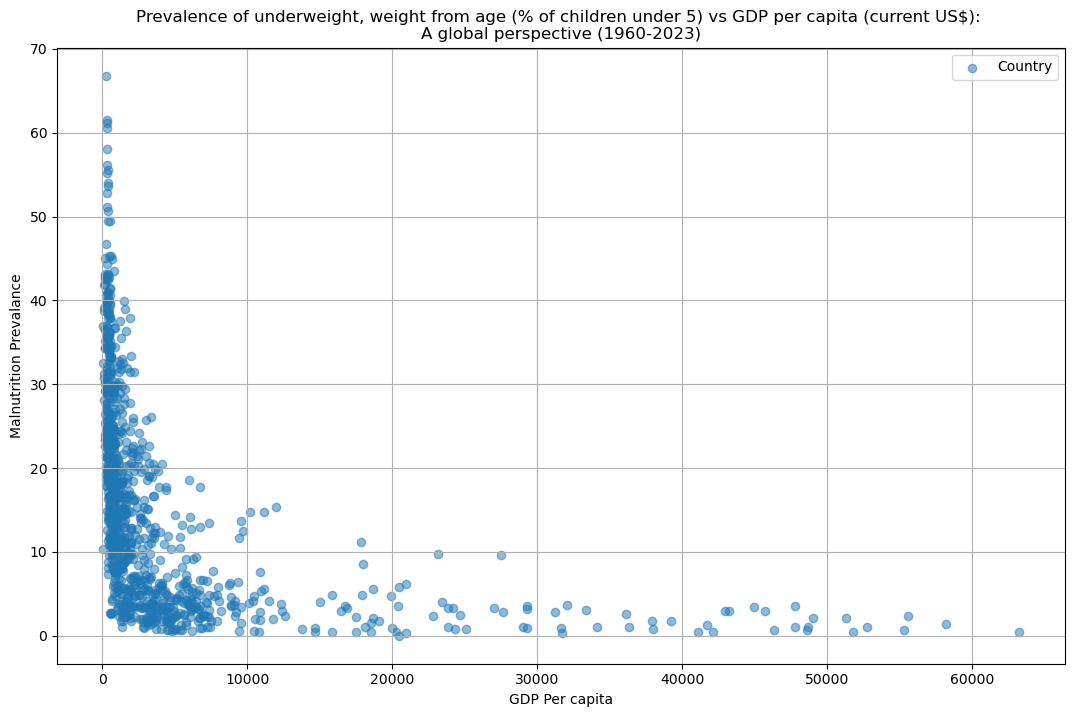

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_20816\486232567.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  geo_colors = plt.cm.get_cmap('tab10', len(unique_geos))


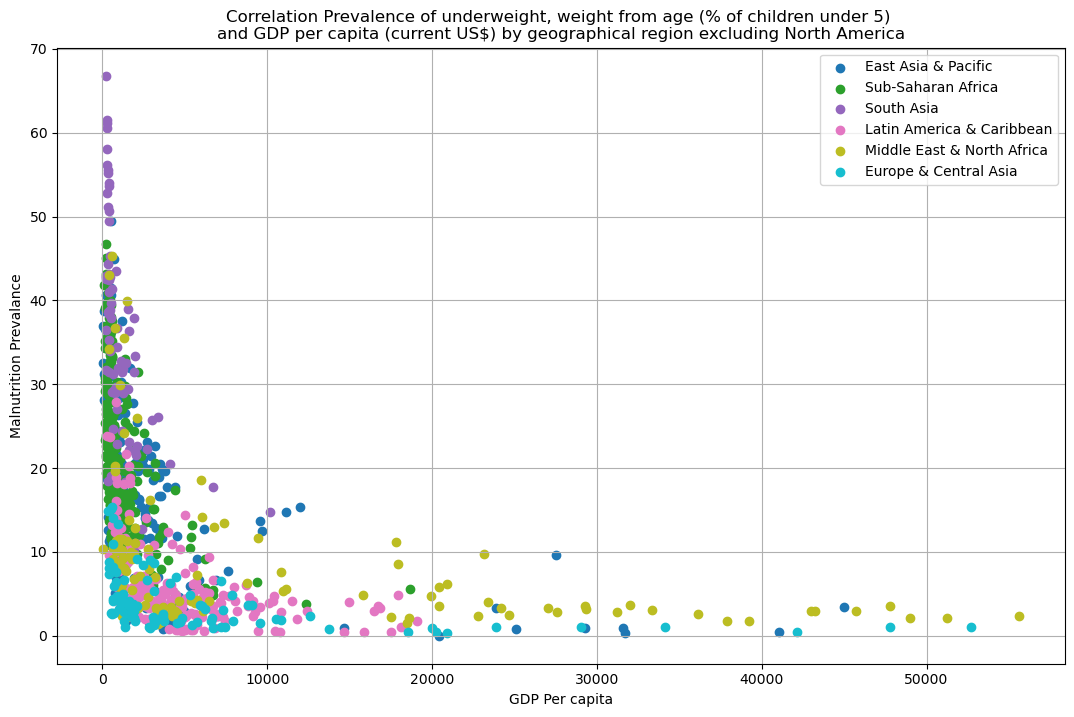

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_20816\486232567.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ilevel_colors = plt.cm.get_cmap('tab10', len(unique_ilevels))


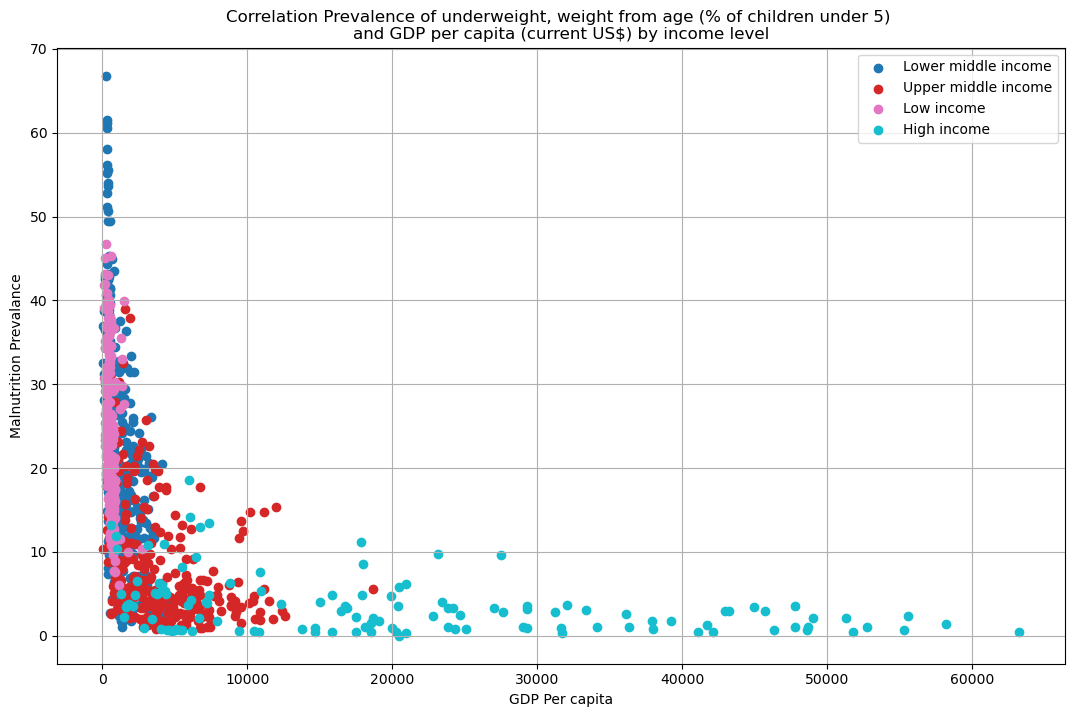

In [55]:
# to use read_excel function
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# storing data from data source into respective data frames (both metadata and original data) 
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)
gdp_metad_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Metadata - Countries', usecols="A,B,C")

mal_data_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Data", skiprows=3)
mal_metad_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Metadata - Countries", usecols="A,B,C")

# dropping the columns we don't need before we merge 
gdp_data_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
gdp_long_data_df = gdp_data_filtered.melt(id_vars='Country Code', var_name="Year", value_name="gdp")


# droping the columns we don't need before we merge 
mal_data_filtered = mal_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
mal_long_data_df = mal_data_filtered.melt(id_vars='Country Code', var_name='Year', value_name='mal')


# merging the long dataframe with the metadata so we can have key columns in the same dataframe before me merge them together
merged_gdp_df = pd.merge(gdp_long_data_df,gdp_metad_df, on='Country Code')
merged_mal_df = pd.merge(mal_long_data_df,mal_metad_df, on='Country Code')

# merging the two data frames on matching columns
merged_df = pd.merge(merged_gdp_df, merged_mal_df, on=['Country Code', 'Region', 'Year','IncomeGroup'])
# dropping NaN values
merged_df = merged_df.dropna()

# graph configuration
plt.figure(figsize=(13,8))
plt.scatter(merged_df['gdp'], merged_df['mal'], alpha=0.5, label="Country")
plt.legend()
plt.title("Prevalence of underweight, weight from age (% of children under 5) vs GDP per capita (current US$): \nA global perspective (1960-2023)")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()



# filter the dataframe excluding the North American region 
geo_filtered_df = merged_df[~merged_df['Region'].isin(['North America'])]
# using color map to get us unique colors for the unique geographical locations
unique_geos = geo_filtered_df['Region'].unique()
geo_colors = plt.cm.get_cmap('tab10', len(unique_geos))
# get a unique color for each geographical location store it in a dictionary
geo_color_map = {geoloc: geo_colors(i) for i, geoloc in enumerate(unique_geos)}

# graph configuration
plt.figure(figsize=(13,8))
for geo_loc in unique_geos:
    # searching the main dataframe for the current geographical region
    geo_data = merged_df[merged_df['Region'] == geo_loc]
    # plot the geographical region on the graph
    plt.scatter(geo_data['gdp'], geo_data['mal'], color=geo_color_map[geo_loc],label=geo_loc )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by geographical region excluding North America")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


# using color map to get us unique colors for the unique income levels
unique_ilevels = merged_df['IncomeGroup'].unique()
# get a unique list of colors based on the number of unique income groups found
ilevel_colors = plt.cm.get_cmap('tab10', len(unique_ilevels))
# get a unique color for each income level store it in a dictionary
ilevel_color_map = {ilevel: ilevel_colors(i) for i, ilevel in enumerate(unique_ilevels)}

# graph configuration
plt.figure(figsize=(13,8))
for income_level in unique_ilevels:
    # searching the main dataframe for the current incomelevel
    ilevel_data = merged_df[merged_df['IncomeGroup'] == income_level]
    # plot the income level on the graph
    plt.scatter(ilevel_data['gdp'], ilevel_data['mal'], color=ilevel_color_map[income_level],label=income_level )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by income level")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


Question 2:

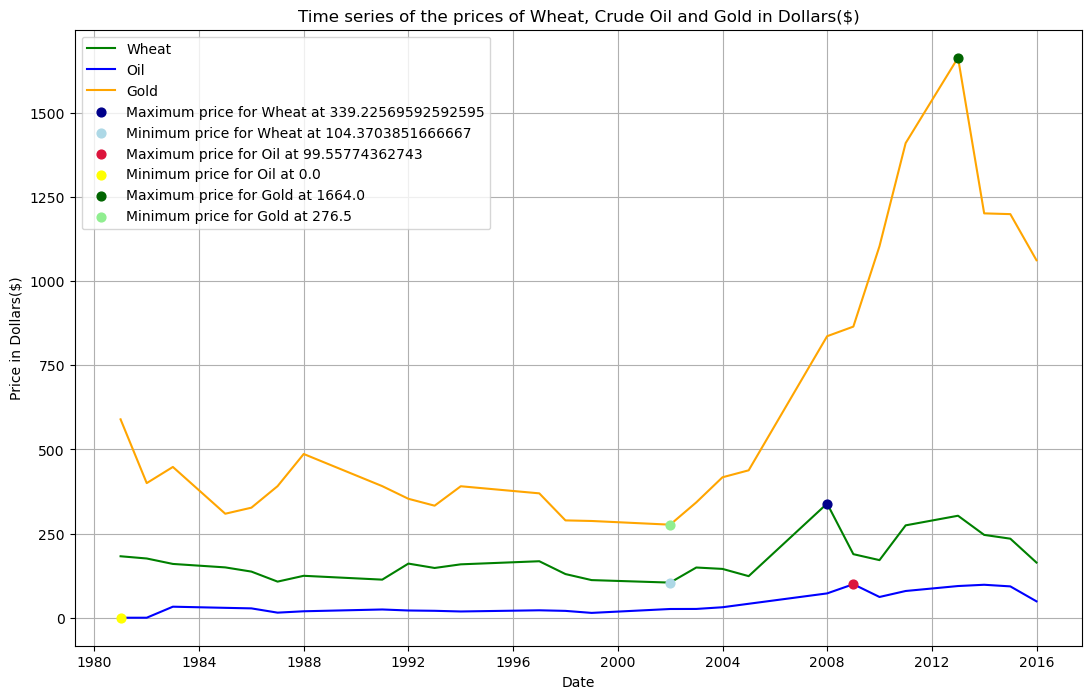

In [40]:
# to get datasets from quandl
import quandl as qdl
# to utilize the plot function 
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# providing api key to allow connections to quandl
qdl.ApiConfig.api_key = 'HQ2ZhGd-MqudXq7ZYiGq'

# specifying the exact datasets to receive from quandl
wheat_prices = qdl.get('COM/PWHEAMT_USD')
oil_prices = qdl.get('WGEC/WLD_CRUDE_WTI')
gold_prices = qdl.get('BUNDESBANK/BBK01_WT5511')

# synchronizing the dates for the 3 datasets 
merged_prices = pd.merge(wheat_prices,oil_prices, on=['Date'],suffixes=('_wheat','_oil'))
merged_prices = pd.merge(merged_prices, gold_prices, on=['Date'])

# replacing the auto generated column names with clear ones
merged_prices.rename(columns={'Value_wheat': 'Wheat_price', 'Value_oil':'Oil_price', 'Value':'Gold_price'}, inplace=True)

# configuring the time series graph
plt.figure(figsize=(13,8))
plt.plot(merged_prices.index, merged_prices['Wheat_price'], label="Wheat", color="green")
plt.plot(merged_prices.index, merged_prices['Oil_price'], label="Oil", color="blue")
plt.plot(merged_prices.index, merged_prices['Gold_price'], label="Gold", color="Orange")

# minimum and maximum colors to uniquely identify the maximum and minimum points for wheat, oil and gold
colors = {
    'Wheat_price': ['lightblue','darkblue'],
    'Oil_price': ['yellow','crimson'],
    'Gold_price': ['lightgreen','darkgreen']
}
# we use these alternative titles in the legend description 
clean_price_titles = {
    'Wheat_price': 'Wheat',
    'Oil_price': 'Oil',
    'Gold_price': 'Gold'
}
# interate through the columns to mark the highest and lowest points for each of them
for column in merged_prices.columns:
    max_value = merged_prices[column].max()
    max_index = merged_prices[column].idxmax()
    plt.scatter(max_index, max_value, color=colors[column][1], s=40, zorder=3, label=f'Maximum price for {clean_price_titles[column]} at {float(max_value)}')
    min_value = merged_prices[column].min()
    min_index = merged_prices[column].idxmin()
    plt.scatter(min_index, min_value, color=colors[column][0], s=40, zorder=3, label=f'Minimum price for {clean_price_titles[column]} at {float(min_value)}')

# graph configuration continued
plt.title("Time series of the prices of Wheat, Crude Oil and Gold in Dollars($)")
plt.xlabel('Date')
plt.ylabel('Price in Dollars($)')
plt.grid(True)
plt.legend()
plt.show()




Question 3:

In [41]:
import pandas as pd

from tabulate import tabulate as tb

c02_df = pd.read_excel('data/C02_emissions.xls', sheet_name='Data', skiprows=3)

c02_filtered_df = c02_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name'])

c02_melted_df = c02_filtered_df.melt(id_vars=['Country Code'], var_name='Year', value_name='C02 Emission')
c02_melted_df['Year'] = pd.to_datetime(c02_melted_df['Year'], format='%Y')
c02_melted_df = c02_melted_df[c02_melted_df['Year'].dt.year == 2010]
c02_melted_df.dropna()

c02_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Country Value": [
        round(c02_melted_df['C02 Emission'].mean(),2),
        round(c02_melted_df['C02 Emission'].median(),2),
        round(c02_melted_df['C02 Emission'].std(),2),
        round(c02_melted_df['C02 Emission'].quantile(0.05),2),
        round(c02_melted_df['C02 Emission'].quantile(0.25),2),
        round(c02_melted_df['C02 Emission'].quantile(0.75),2),
        round(c02_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}

c02_summary_df= pd.DataFrame(c02_summary)

print(tb(c02_summary_df, headers='keys', tablefmt='pretty'))


school_df = pd.read_excel('data/school_enrollment.xls', sheet_name='Data', skiprows=3)

school_filtered_df = school_df.drop(columns=['Indicator Name', 'Indicator Code'])

school_melted_df = school_filtered_df.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='C02 Emission')
school_melted_df['Year'] = pd.to_datetime(school_melted_df['Year'], format='%Y')
school_melted_df = school_melted_df[school_melted_df['Year'].dt.year == 2010]

school_stats_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Country Value": [
        round(school_melted_df['C02 Emission'].mean(),2),
        round(school_melted_df['C02 Emission'].median(),2),
        round(school_melted_df['C02 Emission'].std(),2),
        round(school_melted_df['C02 Emission'].quantile(0.05),2),
        round(school_melted_df['C02 Emission'].quantile(0.25),2),
        round(school_melted_df['C02 Emission'].quantile(0.75),2),
        round(school_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}

school_stats_summary_df= pd.DataFrame(school_stats_summary)

print(tb(school_stats_summary_df, headers='keys', tablefmt='pretty'))

+---+--------------------+---------------+
|   |     Statistic      | Country Value |
+---+--------------------+---------------+
| 0 |        Mean        |     4.41      |
| 1 |       Median       |     2.67      |
| 2 | Standard Deviation |     5.17      |
| 3 |   5th percentile   |     0.11      |
| 4 |  25th Percentile   |     0.76      |
| 5 |  75th Percentile   |      6.2      |
| 6 |  95th Percentile   |     15.17     |
+---+--------------------+---------------+
+---+--------------------+---------------+
|   |     Statistic      | Country Value |
+---+--------------------+---------------+
| 0 |        Mean        |     90.11     |
| 1 |       Median       |     92.96     |
| 2 | Standard Deviation |     9.53      |
| 3 |   5th percentile   |     66.66     |
| 4 |  25th Percentile   |     87.8      |
| 5 |  75th Percentile   |     95.93     |
| 6 |  95th Percentile   |     98.87     |
+---+--------------------+---------------+


Question 4:

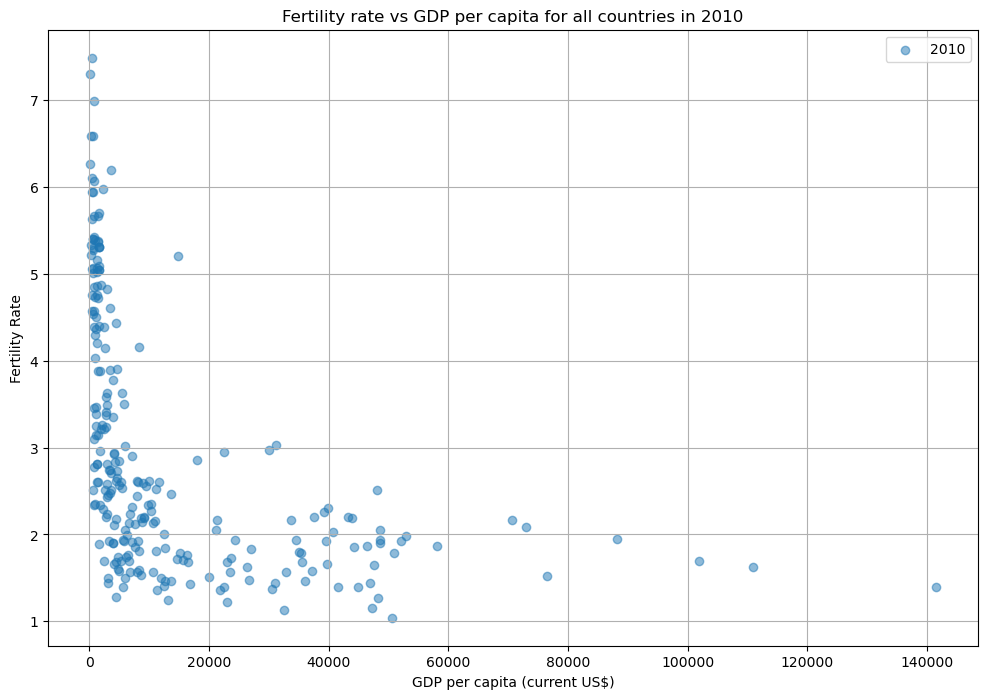

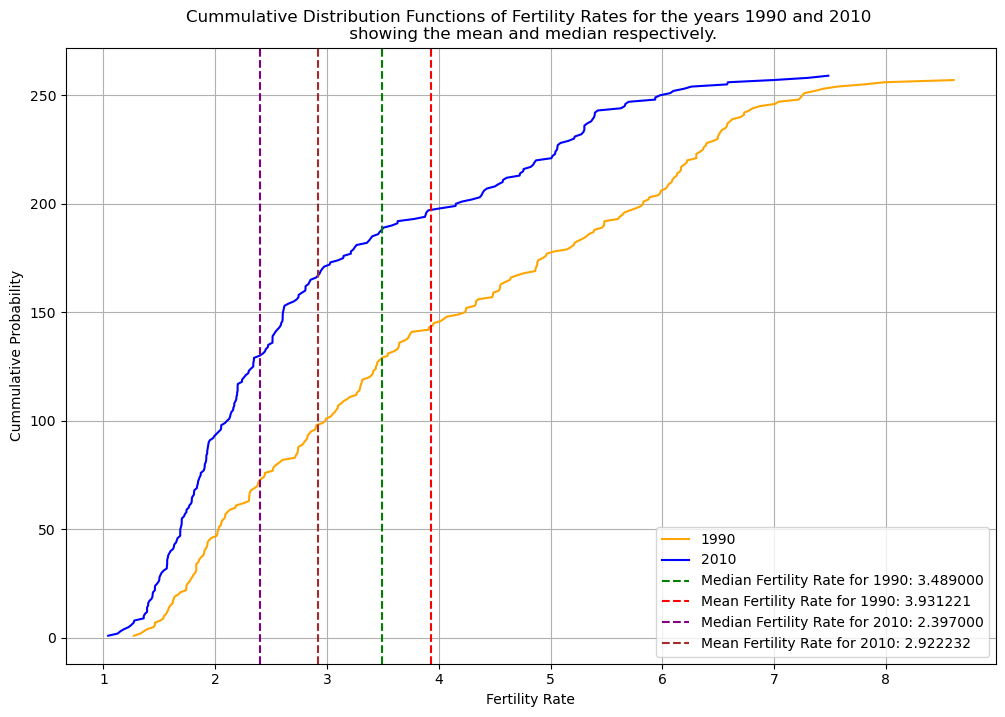

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fertility_rate_df = pd.read_excel('data/fertility_rate.xls', sheet_name='Data', skiprows=3)
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)

fertility_rate_df_filtered = fertility_rate_df.drop(columns=['Indicator Name','Country Name', 'Indicator Code'])
# print(fertility_rate_df_filtered.tail())
fertility_rate_df_melted = fertility_rate_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='Fertility')
# print(fertility_rate_df_melted.tail())

gdp_data_df_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name'])
# print(gdp_data_df_filtered.tail())
gdp_data_df_melted = gdp_data_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='GDP')
# print(gdp_data_df_melted.tail())

fertility_gdp_df = pd.merge(fertility_rate_df_melted, gdp_data_df_melted, on=['Year', 'Country Code'])
fertility_gdp_df_converted = fertility_gdp_df  
fertility_gdp_df_converted['Year'] = pd.to_datetime(fertility_gdp_df['Year'], format='%Y')

fertility_gdp_df_2010 = fertility_gdp_df_converted[fertility_gdp_df_converted['Year'].dt.year==2010]
# print(fertility_gdp_df_2010.tail())

plt.figure(figsize=(12,8))
plt.scatter(fertility_gdp_df_2010['GDP'], fertility_gdp_df_2010['Fertility'], alpha=0.5, label='2010')
plt.title("Fertility rate vs GDP per capita for all countries in 2010")
plt.ylabel("Fertility Rate")
plt.xlabel("GDP per capita (current US$)")
plt.grid(True)
plt.legend()
plt.show()

# preparing to calculate CDF for fertility variable for 1990 and 2010, so we drop the GDP column
fertility_gdp_df= fertility_gdp_df.drop(columns=['GDP'])

fgdp_1990  = fertility_gdp_df[(fertility_gdp_df['Year'].dt.year == 1990)]
fgdp_2010  = fertility_gdp_df[(fertility_gdp_df['Year'].dt.year == 2010)]
# print(fgdp_1990.tail())
# sorting in ascending order both years data 
fgdp_1990 = fgdp_1990.dropna()
fgdp_1990 = fgdp_1990.sort_values(by='Fertility')
fgdp_2010 = fgdp_2010.dropna()
fgdp_2010 = fgdp_2010.sort_values(by='Fertility')

# get the cummulative distribution
cdf_1990 = np.arange(1, len(fgdp_1990)+1/ len(fgdp_1990))
cdf_2010 = np.arange(1, len(fgdp_2010)+1/ len(fgdp_2010))

# fgdp_filtered["Cummulative Fertility Rate"] = fgdp_filtered['Fertility'].cumsum()

# print(cdf_1990.head())

median_fertililty_1990 = fgdp_1990['Fertility'].median()
mean_fertility_1990 = fgdp_1990['Fertility'].mean()

median_fertililty_2010 = fgdp_2010['Fertility'].median()
mean_fertility_2010 = fgdp_2010['Fertility'].mean()


plt.figure(figsize=(12,8))
plt.plot(fgdp_1990['Fertility'], cdf_1990, color='orange', label='1990')
plt.plot(fgdp_2010['Fertility'], cdf_2010, color='blue', label='2010')
plt.axvline(median_fertililty_1990, color='green', linestyle='--', label=f'Median Fertility Rate for 1990: {median_fertililty_1990:f}')
plt.axvline(mean_fertility_1990, color='red', linestyle='--', label=f'Mean Fertility Rate for 1990: {mean_fertility_1990:f}')
plt.axvline(median_fertililty_2010, color='purple', linestyle='--', label=f'Median Fertility Rate for 2010: {median_fertililty_2010:f}')
plt.axvline(mean_fertility_2010, color='brown', linestyle='--', label=f'Mean Fertility Rate for 2010: {mean_fertility_2010:f}')
plt.title("Cummulative Distribution Functions of Fertility Rates for the years 1990 and 2010 \n showing the mean and median respectively.")
plt.xlabel('Fertility Rate')
plt.ylabel('Cummulative Probability')
plt.legend()
plt.grid()
plt.show()









Question 5:

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


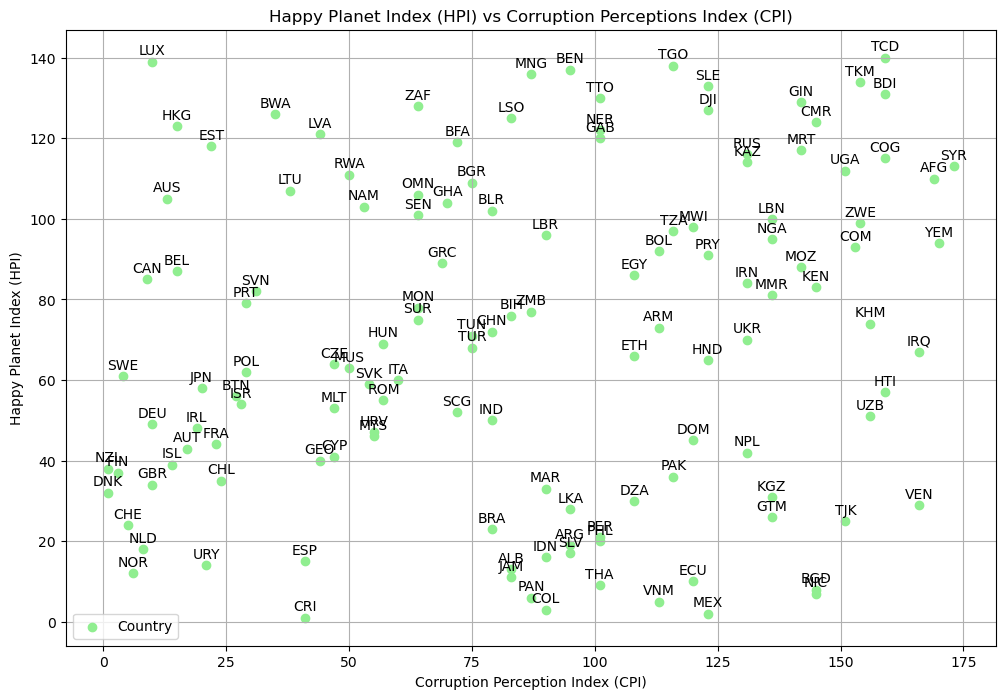

In [43]:
import pandas as pd

import matplotlib.pyplot as plt

cpi_df = pd.read_excel('data/CPI_results.xlsx', sheet_name='CPI 2015-2016', usecols='A,B,C,F')
hpi_df  = pd.read_excel('data/hpi-data.xlsx', sheet_name='Rank order', usecols='B,C,J', skiprows=6)

hpi_cpi_df = pd.merge(hpi_df, cpi_df,on=['Country'])

plt.figure(figsize=(12,8))
plt.title("Happy Planet Index (HPI) vs Corruption Perceptions Index (CPI)")
plt.scatter( hpi_cpi_df['CPI 2016 Rank'], hpi_cpi_df['HPI Rank'], marker='o', color='lightgreen', label="Country")
for index, row in hpi_cpi_df.iterrows():
    plt.annotate(row['WB Code'], ( row['CPI 2016 Rank'],row['HPI Rank']), textcoords="offset points", xytext=(0,5), ha='center')
plt.xlabel("Corruption Perception Index (CPI)")
plt.ylabel("Happy Planet Index (HPI)")
plt.grid(True)
plt.legend()
plt.show()
